In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
import pydicom
from itertools import chain
from glob import glob
import matplotlib.pyplot as plt

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [3]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load sample data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
726,00003801_002.png,No Finding,2,3801,047Y,F,PA,2710,2991,0.143,0.143
2311,00011786_000.png,No Finding,0,11786,044Y,F,PA,2666,2991,0.143,0.143
1352,00007034_021.png,No Finding,21,7034,030Y,F,AP,3056,2544,0.139,0.139


In [4]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
18494,00004911_013.png,Effusion,13,4911,48,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49111,00012460_001.png,Mass,1,12460,63,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44548,00011460_022.png,Pneumothorax,22,11460,16,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


[Text(0, 0.5, 'Number of Images with Label')]

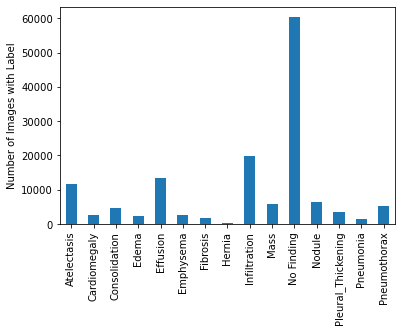

In [5]:
# This histogram shows distribution of all diseases and no disease. 
# Here we can see that pnuemonia is small percentage in entire dataset. Majority of chest x-rays are clean without disease

ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

In [6]:
# count of xrays with pneumonia detected. Only 1431 xrays has pnemonia detected, 
# so that just 1.27% of xray showing pneumonia psitive   

all_xray_df['Pneumonia'].value_counts()

0.0    110689
1.0      1431
Name: Pneumonia, dtype: int64

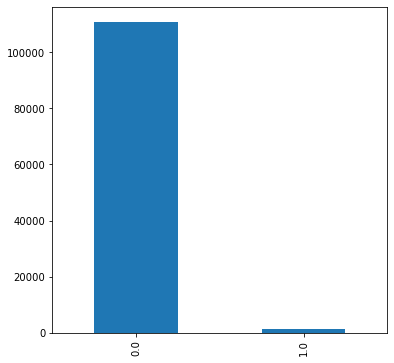

In [7]:
# hist representation of count 

plt.figure(figsize=(6,6))
all_xray_df['Pneumonia'].value_counts().plot(kind='bar')

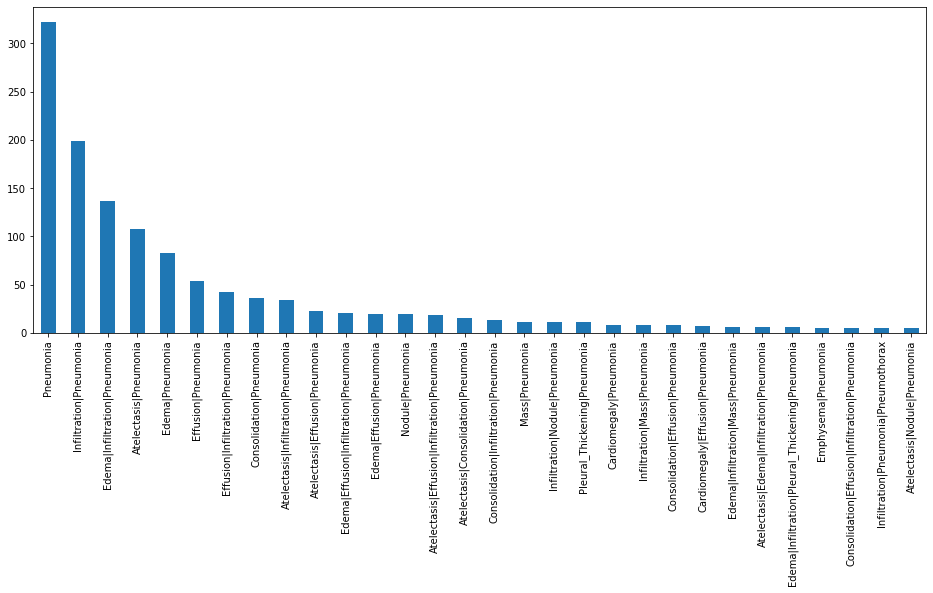

In [8]:
# Hist showing distribution of other diseases that are comorbid with pneumonia, 30 most commonly occuring. 

plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

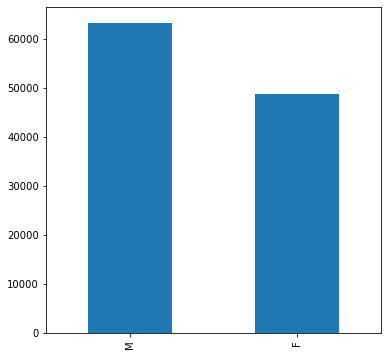

In [9]:
## hist showing distribution across Male and Female gender. Male xrays are comparatively more than Female xrays

plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

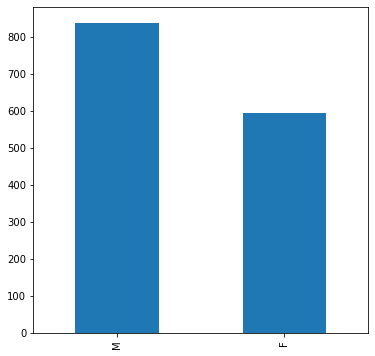

In [10]:
# hist showing male and female xray distribution with pneumonia. 


plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([5.2410e+03, 2.2771e+04, 3.2044e+04, 4.1729e+04, 9.9450e+03,
        3.7400e+02, 0.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([  1.  ,  17.52,  34.04,  50.56,  67.08,  83.6 , 100.12, 116.64,
        133.16, 149.68, 166.2 , 182.72, 199.24, 215.76, 232.28, 248.8 ,
        265.32, 281.84, 298.36, 314.88, 331.4 , 347.92, 364.44, 380.96,
        397.48, 414.  ]),
 <a list of 25 Patch objects>)

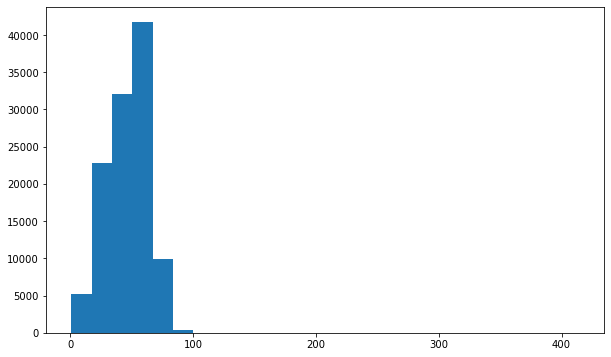

In [11]:
# hist showing Patient Age distrituion. Here we can see there are ages more than 100 years and going upto 400, possibly information recorded incorrectly.   

plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'], bins=25)

In [12]:
# how many patients are showing older than 100 years. These entries seems to recorded incorrectly for patient age. 

all_xray_df[all_xray_df['Patient Age'] > 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


(array([116., 334., 400., 463., 113.,   4.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  2. ,  18.4,  34.8,  51.2,  67.6,  84. , 100.4, 116.8, 133.2,
        149.6, 166. , 182.4, 198.8, 215.2, 231.6, 248. , 264.4, 280.8,
        297.2, 313.6, 330. , 346.4, 362.8, 379.2, 395.6, 412. ]),
 <a list of 25 Patch objects>)

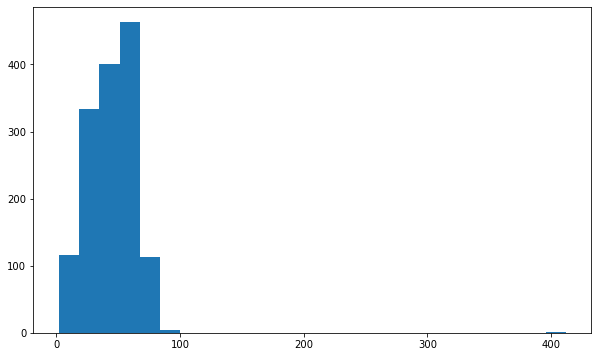

In [13]:
# hist showing Patient Age distribution having pneumonia. This distribution is similar to overall Patient Age distribution.  

plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'], bins=25)

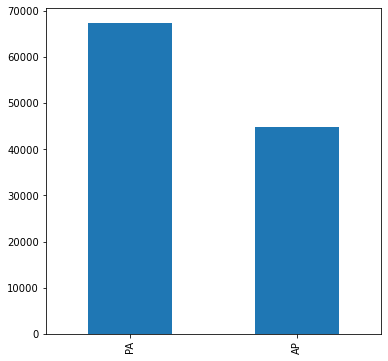

In [14]:
# hist showing view position distribution on entire dataset. 

plt.figure(figsize=(6,6))
all_xray_df['View Position'].value_counts().plot(kind='bar')

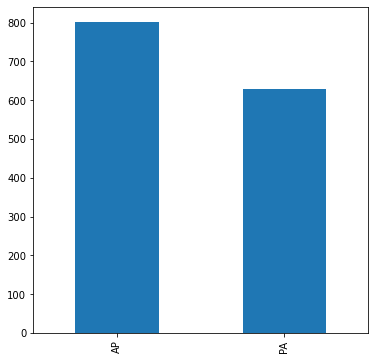

In [15]:
# hist showing view position distribution for patient with pneumonia.
# This distribution is similar to overall distribution by view position. 

plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia ==1]['View Position'].value_counts().plot(kind='bar')

In [2]:
## Load sample data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
1223,00006450_010.png,No Finding,10,6450,037Y,F,PA,2570,2577,0.143,0.143
563,00002898_001.png,No Finding,1,2898,041Y,M,PA,2500,2048,0.168,0.168
4037,00019880_008.png,Effusion|Infiltration|Mass,8,19880,065Y,M,AP,3056,2444,0.139,0.139


In [3]:
# build the image path for each image and attach to respective Image Index in dataframe 

all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', sample_df.shape[0])
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)
sample_df.sample(3)

Scans found: 112120 , Total Headers 5606


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
4876,00025642_000.png,No Finding,0,25642,042Y,M,PA,2992,2991,0.143,0.143,/data/images_011/images/00025642_000.png
2108,00010835_000.png,No Finding,0,10835,056Y,F,PA,2048,2500,0.168,0.168,/data/images_005/images/00010835_000.png
2941,00014443_003.png,Infiltration|Mass,3,14443,065Y,F,PA,2992,2991,0.143,0.143,/data/images_007/images/00014443_003.png


In [4]:
# contruct columns for each disease from Finding labels 

all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
5419,00029385_005.png,No Finding,5,29385,052Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2958,00014546_006.png,No Finding,6,14546,058Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
411,00002163_000.png,No Finding,0,2163,040Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
# Filter dataframe for pneumonia images. 

pne_sample_df = sample_df[sample_df['Pneumonia']==1]

len(pne_sample_df)

62

<Figure size 936x360 with 0 Axes>

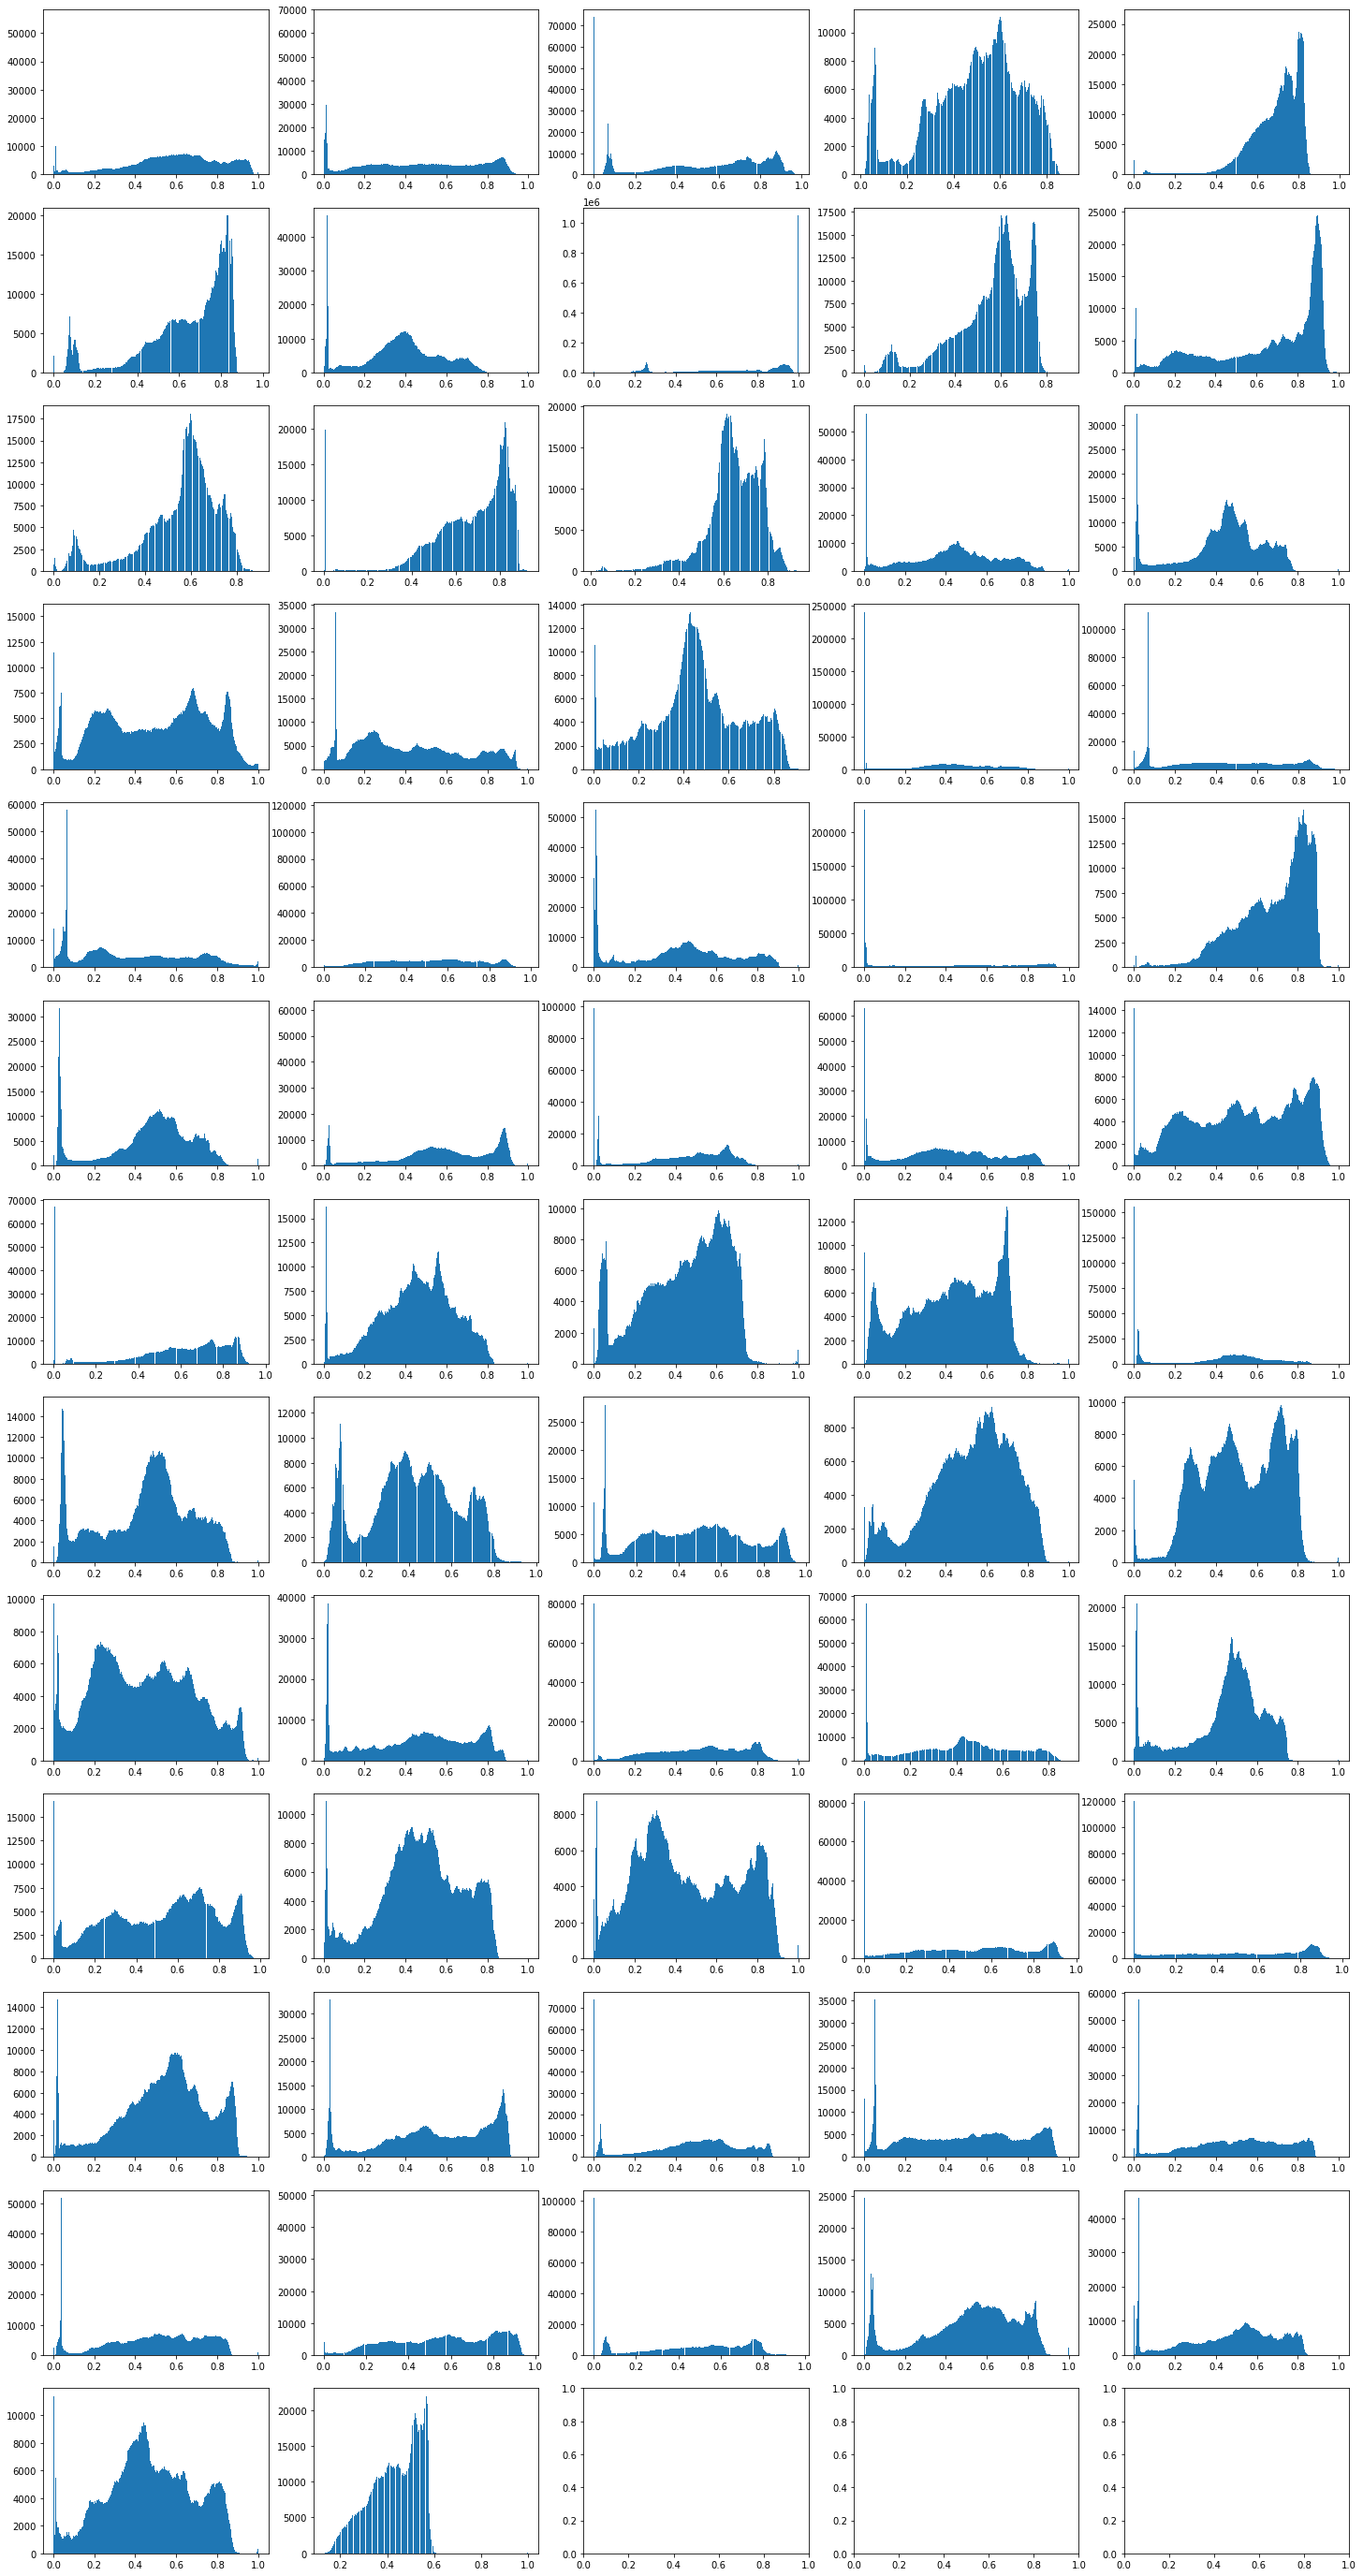

In [6]:
# Analyze image intensity distribution for all pneumonia images.
# There is spike around 0 due to black line which can be seen on extreme left margin of image.

images = []
plt.figure(figsize=(13,5))

for i in range(0,62):
    img = plt.imread(pne_sample_df['path'].values[i])
    images.append(img)
    
    
fig, axs = plt.subplots(13, 5, figsize = (25,50))

for (img, ax) in zip(images, axs.flatten()):
    if img.any():
        ax.hist(img.ravel(), bins = 256)


In [7]:
# Function to analyze mean and standard deviation for image 

def mean_std_distribution(images):
    mean = []
    std = []

    for img in images: 
        mean.append(np.mean(img))
        std.append(np.std(img))
    
    plt.hist(mean, bins=10)
    plt.hist(std, bins=10)


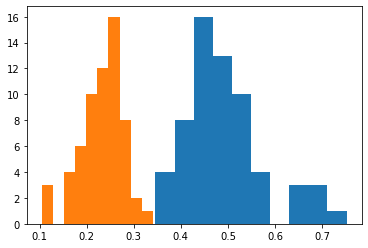

In [8]:
# Analyze mean and standard deviation distribution for images with pneumonia positive
# From the distribution we can observe that mean intensity peaks around 0.45 (blue) and standard deviation 
# around 0.25 (orange) for images with pneumonia condition. Distribution is pretty narrow for both mean and std.For mean it 
# ranges from 0.35 to 0.58 and then from 0.64 to 0.8. For std from 0.15 to 0.34 

mean_std_distribution(images)

In [9]:
# Filter dataframe for images with no disease. 

no_find_sample_df = sample_df[sample_df['No Finding']==1]

len(no_find_sample_df)

3044

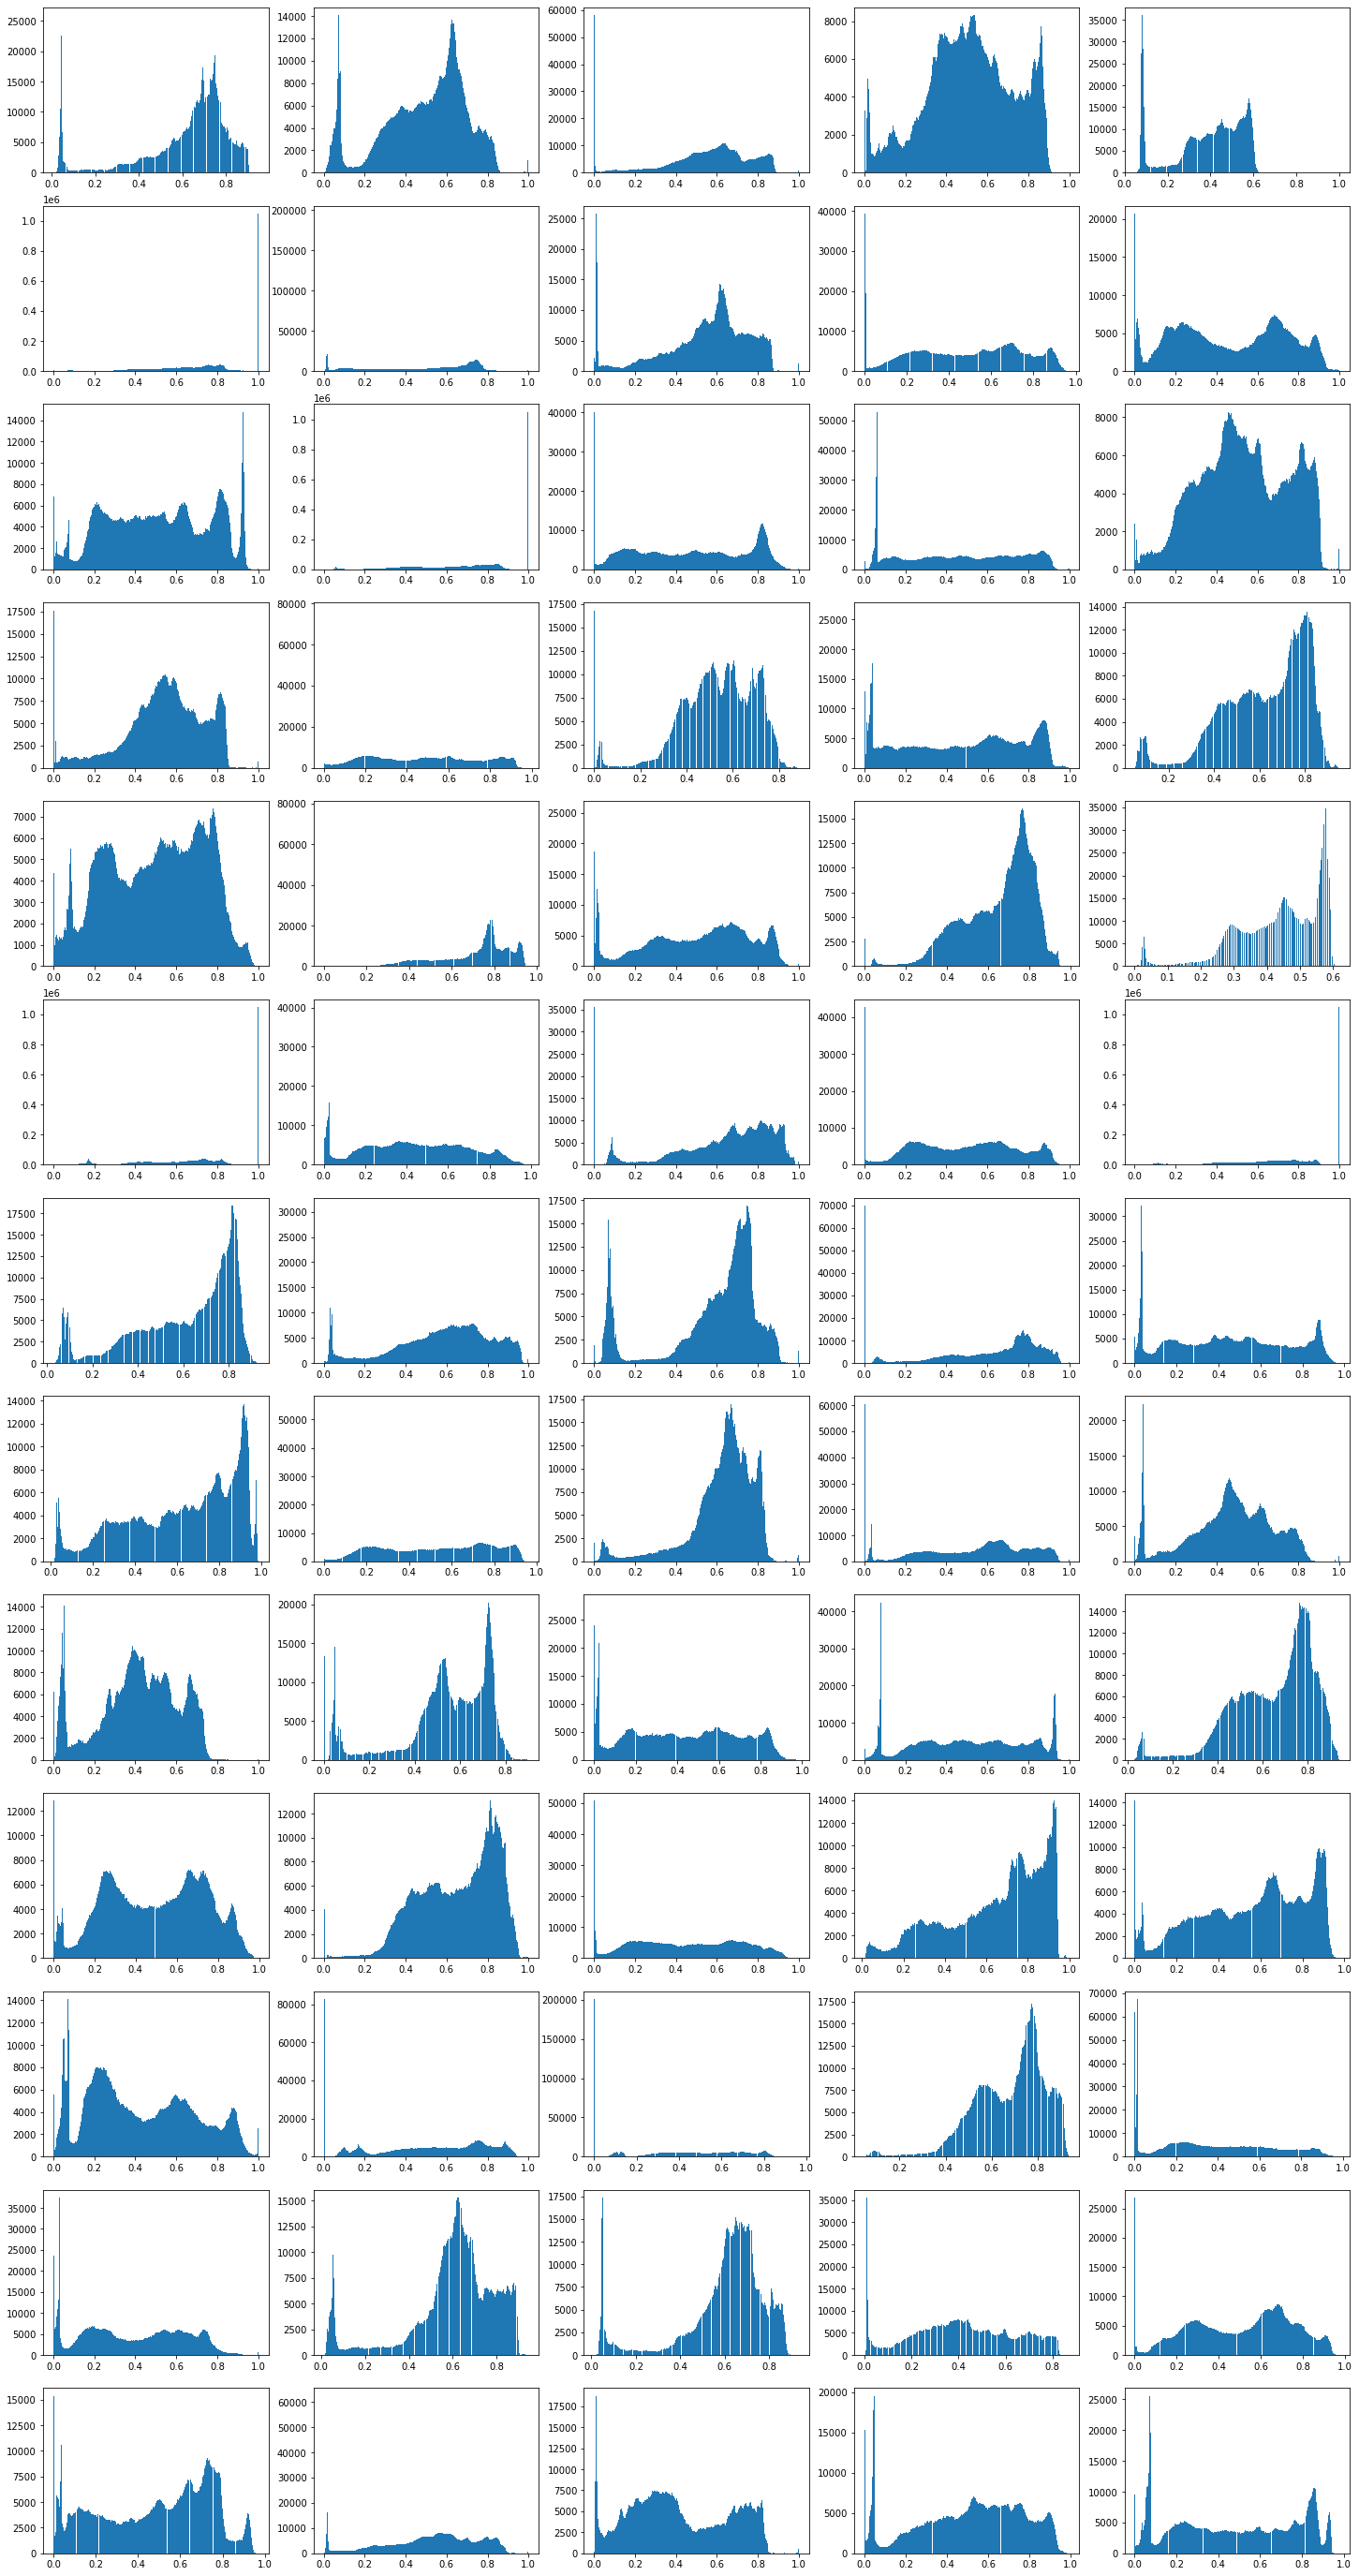

In [10]:
# plot and analyze image intensity distribution for first 65 images with no disease. 
# There is spike around 0 due to black line which can be seen on extreme left margin of image. 
images = []

for i in range(0,65):
    img = plt.imread(no_find_sample_df['path'].values[i])
    images.append(img)

fig, axs = plt.subplots(13, 5, figsize = (25,50))

for (img, ax) in zip(images, axs.flatten()):
    if img.any():
        ax.hist(img.ravel(), bins = 256)    
    
   

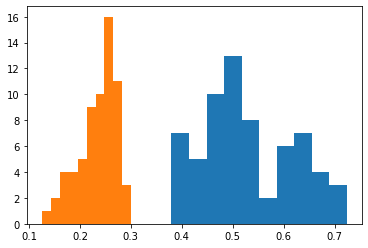

In [11]:
# Analyze mean and standard deviation distribution for images with no disease.
# From the below distribution we can observe that mean intensity peaks around 0.5 and standard deviation around 0.27.
# here distribution is spread across for both mean and std. For mean it ranges from 0.38 to 0.72 for std from 0.12 to 0.29

mean_std_distribution(images)

In [ ]:
# Conclusion: We analyze image intensity plots and mean/std distribution. There is subtle difference in mean and std 
# distribution for images with pneumonia conditions vs images with no disease. We can say deep CNN can inherently learn such 
# distribution to classify or detect pneumonia from normal conditions. 

In [ ]:
# Training data should be prepared such that equal distribution of positive and negative samples can be included. 
# Also we analyzes distribution is almost similar across age, gender and view when we plot and compare between 
# pneumonia positive and images with normal images. So the training data having equal number of positive and negative samples 
# will have similar distribution across age gender and sample when compared to overall distribution for all images. 